In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### 1. Read the txt data into a DataFrame and display the first five rows of data. Print the shape of your data

In [2]:
df = pd.read_csv("tictac_single.txt", header=None, sep=" ")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,-1,0,0,0,0,0,1,0,6
1,1,0,1,0,0,0,0,-1,0,1
2,0,0,0,0,0,1,0,0,0,2
3,0,1,1,0,0,0,0,-1,0,0
4,1,1,-1,0,0,0,0,-1,0,3


In [4]:
df.shape

(6551, 10)

### 2. Use the info() method to display the data types for the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6551 non-null   int64
 1   1       6551 non-null   int64
 2   2       6551 non-null   int64
 3   3       6551 non-null   int64
 4   4       6551 non-null   int64
 5   5       6551 non-null   int64
 6   6       6551 non-null   int64
 7   7       6551 non-null   int64
 8   8       6551 non-null   int64
 9   9       6551 non-null   int64
dtypes: int64(10)
memory usage: 511.9 KB


In [6]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [7]:
df[9].value_counts()

9
0    1564
4    1046
2     973
1     845
6     544
3     513
8     459
5     353
7     254
Name: count, dtype: int64

### 3. Create test and training datasets using the last column as y. The test dataset should consist of 20% of the total dataset, and you may specify a value for the random_state parameter and randomly shuffle the data.

In [8]:
X = df.iloc[0:, 0:9]
y = df.iloc[0:, 9]

In [9]:
X.shape

(6551, 9)

In [10]:
y.shape

(6551,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

### 4. Create and fit the model, using your selected model (e.g., SVM, KNN, Random Forest or HistGradientBoostingClassifier). Using hyperparameter tuning to find the best model.

In [12]:
rf = RandomForestClassifier()

In [13]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
rf.score(X_train, y_train)

1.0

In [15]:
rf.score(X_test, y_test)

0.9168573607932876

In [16]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [17]:
rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_rf, cv =5, n_jobs = -1)

In [18]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [19]:
print(rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

{'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 150}


### 5. Based on step 4 (logistic regression), calculate and display ‘accuracy’, ‘precision’, ‘recall’ and ‘f1-score’ for testing dataset. Plot confusion matrix (discussed in class) for testing dataset. Draw ROC/AUC curve for testing dataset

Accuracy: 0.912
Precision: 0.908
Recall: 0.890
F1 Score: 0.897


Text(113.9222222222222, 0.5, 'predicted label')

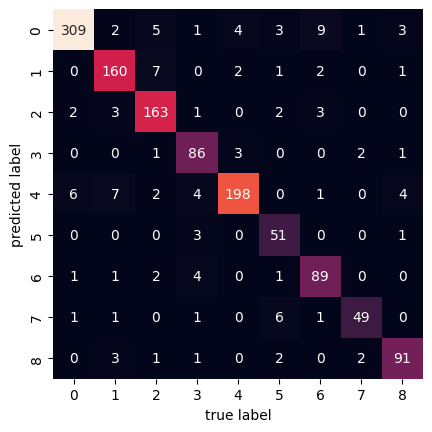

In [22]:
from sklearn import metrics
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, best_rf.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, best_rf.predict(X_test), average='macro')
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, best_rf.predict(X_test), average='macro')
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, best_rf.predict(X_test), average='macro')
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, best_rf.predict(X_test))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

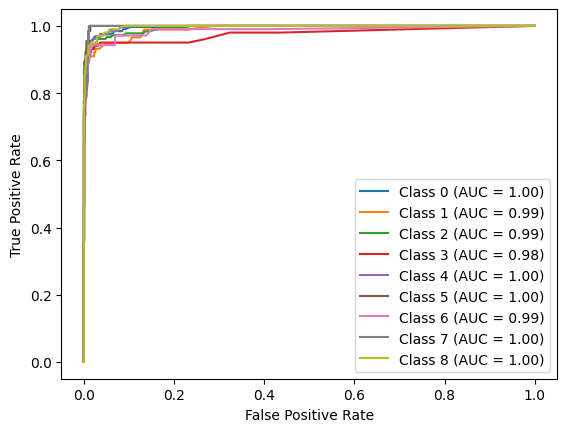

In [23]:
# Plot ROC/AUC curve
y_prob = best_rf.predict_proba(X_test)
classes = y_prob.shape[1]
for i in range(classes):
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = metrics.roc_curve(y_test == i, y_prob[:, i])  # One-vs-all
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

### 6. Similarly, select another model (e.g., neural networks). Using hyperparameter tuning to find the best model. Report the model performance as well (step 5). (You will learn details about various machine learning models in your future courses. Don’t worry too much now.)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

from skorch import NeuralNetClassifier

In [25]:
# Convert pandas Dataframe to torch tensor
Xtrain= torch.tensor(X_train.values.astype(np.float32))  # convert to torch tensor
ytrain = torch.tensor(y_train.values.astype(np.float32)).reshape(-1, 1) # convert to torch tensor

Xtest= torch.tensor(X_test.values.astype(np.float32))  # convert to torch tensor
ytest = torch.tensor(y_test.values.astype(np.float32)).reshape(-1, 1) # convert to torch tensor

print(Xtrain.shape)
print(ytrain.shape)

torch.Size([5240, 9])
torch.Size([5240, 1])


In [26]:
# PyTorch classifier
class MyClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(9, 12)
        self.act = nn.ReLU()
        self.output = nn.Linear(12, 9)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

In [27]:
# Create model with skorch
NNmodel = NeuralNetClassifier(
    MyClassifier,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    verbose=False)

In [28]:
param_grid_nn = {
    'batch_size': [10, 20],
    'max_epochs': [50, 100, 200, 300]}

grid_nn = GridSearchCV(estimator=NNmodel, param_grid=param_grid_nn, n_jobs=-1, cv=3)
ytrain = ytrain.squeeze()
ytrain = torch.tensor(ytrain).long() 
grid_nn.fit(Xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MyClassifier'>,
),
             n_jobs=-1,
             param_grid={'batch_size': [10, 20],
                         'max_epochs': [50, 100, 200, 300]})

In [ ]:
print(grid_nn.best_params_)

Accuracy: 0.394
Precision: 0.455
Recall: 0.256
F1 Score: 0.251


Text(113.9222222222222, 0.5, 'predicted label')

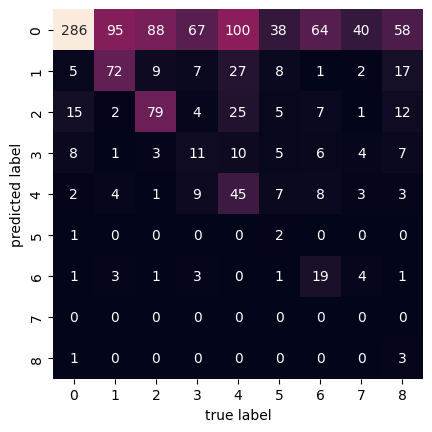

In [32]:
# Neural Networks Model Performance for test data
best_nn = grid_nn.best_estimator_

# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(ytest, best_nn.predict(Xtest))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(ytest, best_nn.predict(Xtest), average='macro')
print("Precision: %.3f" % precision)

recall = metrics.recall_score(ytest, best_nn.predict(Xtest), average='macro')
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(ytest, best_nn.predict(Xtest), average='macro')
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(ytest, best_nn.predict(Xtest))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

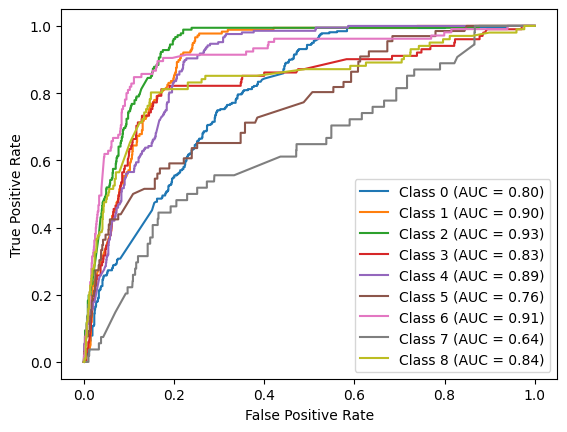

In [34]:
# Plot ROC/AUC curve
y_prob = best_nn.predict_proba(Xtest)
classes = y_prob.shape[1]
for i in range(classes):
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = metrics.roc_curve(y_test == i, y_prob[:, i])  # One-vs-all
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

random forest classifier is performing better in our case. this could be checked by looking at the metric, it has a higher value for precision, recall, f1, and accuracy.
this might be due to very limited hypertuning of the neural net due to computational limitations on my machine. changing the architecture by increasing decreasing the number of layers, using a different activation function can also increase the performance of the neural net. overall with basic hypertuning random forest classifier performs much better than the neural network.